<a href="https://colab.research.google.com/github/zhrnnsw/PCVK_Ganjil_2023/blob/main/week-5/Week5_Zahra_Annisa_Wahono.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Laporan Praktikum Pertemuan 5 - Operasi Aritmatika dan Logika**
---


> Nama: Zahra Annisa Wahono
>
> Kelas: TI-3H / 29
>
> NIM: 2141720016


# **TUGAS PRAKTIKUM**

In [4]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Buat Gamma Correction sesuai dengan petunjuk berikut**
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
------------------------------------
Masukkan nilai Gamma: 3


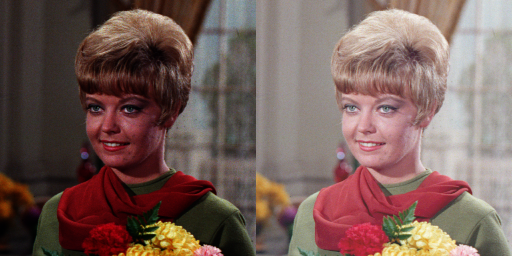

In [5]:
print(' Gamma Correction pada citra ')
print('------------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a nnumber')

original = cv.imread('/content/drive/MyDrive/Semester 5/PCVK/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)


## **2. Buat Simulasi Image Depth**
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0(0000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 2^7 = 128, dst.

Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra, silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar.

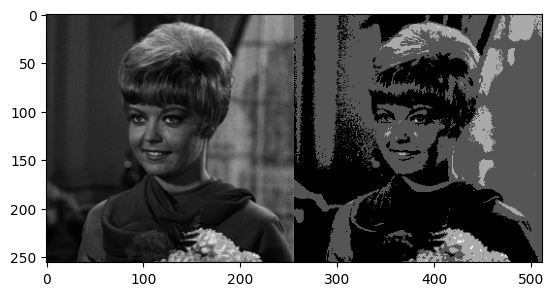

In [6]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/Semester 5/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y, x] = np.clip(round(original[y, x] / level) * level, 0, 255);

final_frame = cv.hconcat((original, depth_image))
plt.imshow(final_frame, cmap='gray')

## **3. Buat Modul Average Denoising**
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya.
Citra asli sudah disediakan pada **/images/galaxy.jpg.**
100 Citra dengan Gaussian Noise sudah disediakan pada **/images/noises/*.jpg**
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder menggunakan modul glob (**import glob**).

Dengan menggunakan code di bawah, anda tinggal memanggil image difolder tersebut menggunakan cv_img[0], cv_img[1], dst.

Catat hasil PSNR pada tabel berikut. Dari hasil yang sudah anda catat, tuliskan kesimpulan Anda:

Nilai PSNR untuk Jumlah Citra di Average 5 adalah 27.558901552673525 (dB)


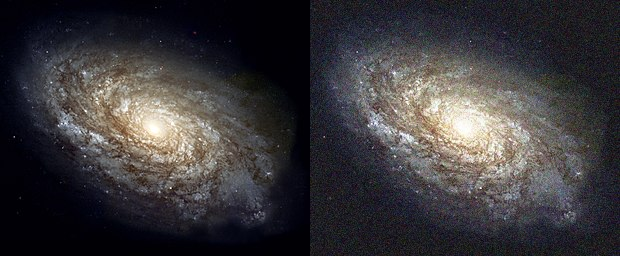



Nilai PSNR untuk Jumlah Citra di Average 10 adalah 27.540038051474937 (dB)


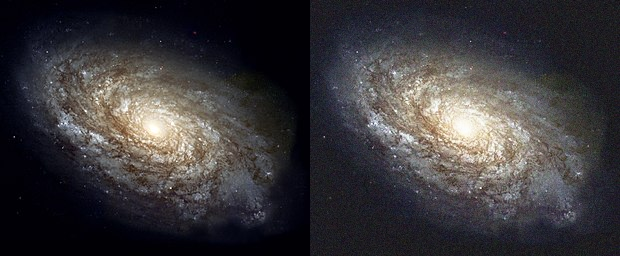



Nilai PSNR untuk Jumlah Citra di Average 20 adalah 27.561962637745296 (dB)


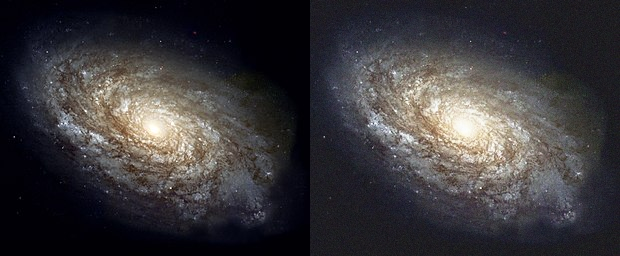



Nilai PSNR untuk Jumlah Citra di Average 40 adalah 27.498707056580773 (dB)


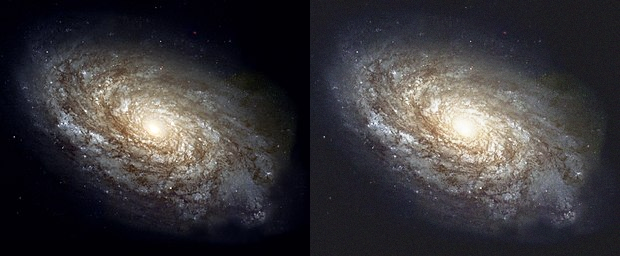



Nilai PSNR untuk Jumlah Citra di Average 80 adalah 27.520624915743426 (dB)


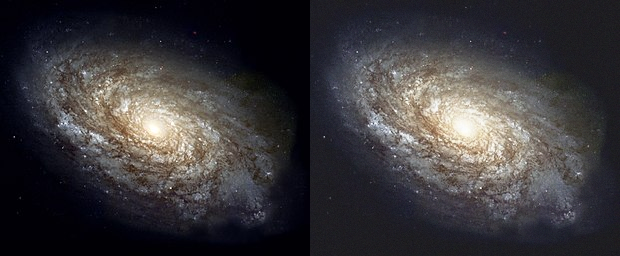



Nilai PSNR untuk Jumlah Citra di Average 100 adalah 27.51901892097624 (dB)


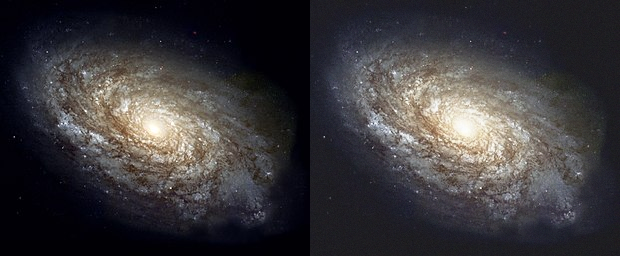

In [43]:
import cv2 as cv
import glob
from math import log10, sqrt
import numpy as np

original = cv.imread('/content/drive/MyDrive/Semester 5/PCVK/Images/galaxy.jpg')
cv_img = []

# Mengambil semua gambar dari folder noises
for img in glob.glob('/content/drive/MyDrive/Semester 5/PCVK/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Daftar nilai noise_number yang ingin Anda gunakan
noise_numbers = [4, 9, 19, 39, 79, 99] #indeks array

for i in noise_numbers:
    dst = cv_img[0]

    for j in range(1, i):
        alpha = 1.0 / j
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[j], alpha, dst, beta, 0.0)

    def PSNR(original, compressed):
        mse = np.mean((original - compressed) ** 2)
        if(mse == 0):
            return 100
        max_pixel = 255.0
        psnr = 20 * log10(max_pixel / sqrt(mse))
        return psnr

    compressed = dst
    psnr = PSNR(original, compressed)

    print(f'Nilai PSNR untuk Jumlah Citra di Average {i+1} adalah {psnr} (dB)')
    galaxy_frame = cv.hconcat((original, dst))
    cv2_imshow(galaxy_frame)
    print('\n')

**Kesimpulan PSNR**


Kesimpulan dari nilai PSNR adalah bahwa semakin tinggi nilai PSNR, semakin baik kualitas gambar hasil penggabungan (dst) dan semakin mirip gambar tersebut dengan gambar asli (original). Di sisi lain, jika nilai PSNR rendah, itu menandakan bahwa gambar hasil penggabungan (dst) memiliki kualitas yang buruk dan memiliki perbedaan yang signifikan dengan gambar asli (original). Dengan kata lain, PSNR adalah metrik yang digunakan untuk mengukur sejauh mana gambar hasil penggabungan mendekati kualitas gambar asli.

## **4. Buat image masking untuk image berikut**
Image kiri adalah image asli (**images/KTP**),
sedangkan image paling kanan adalah hasilnya:

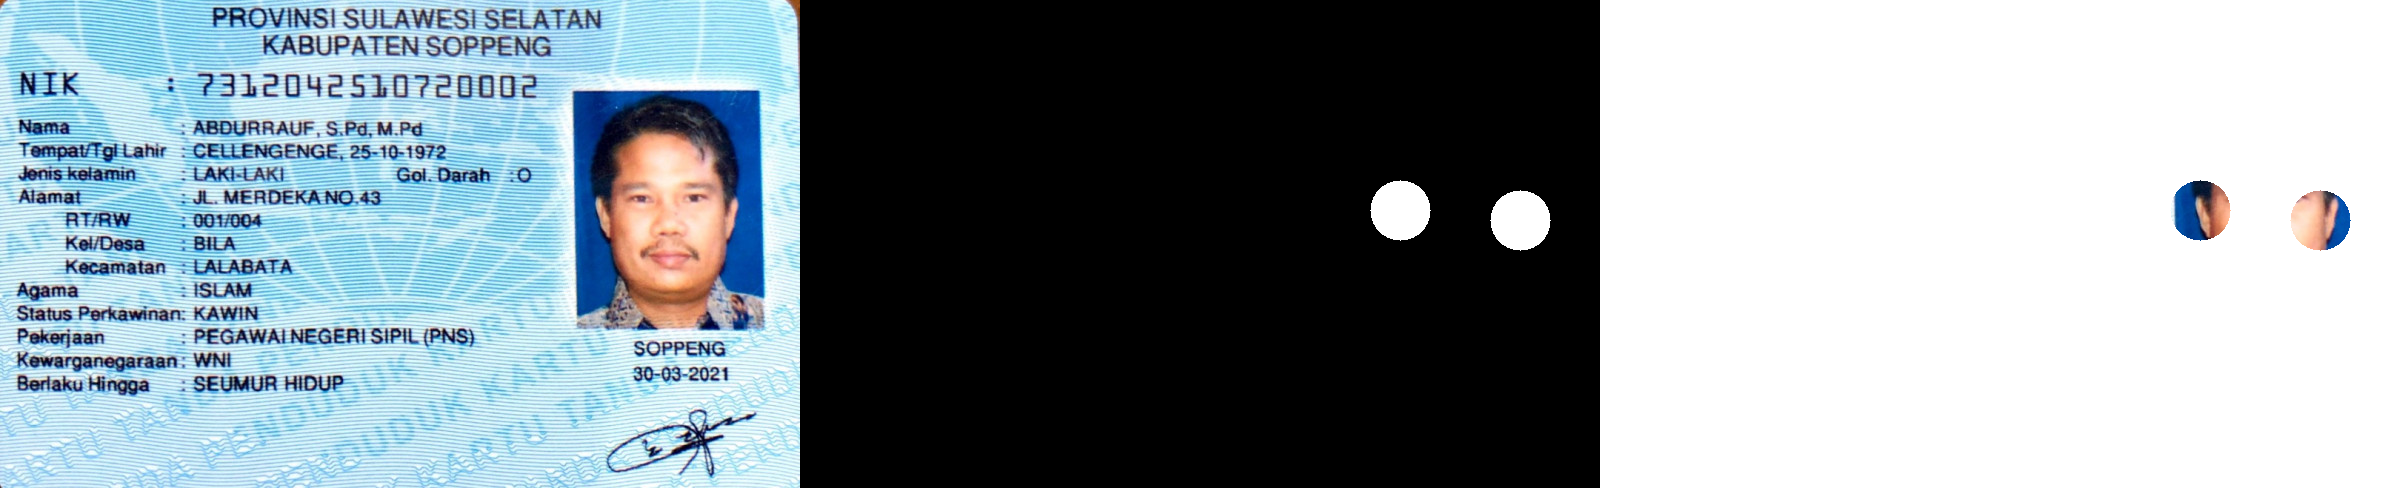

In [20]:
from google.colab.patches import cv2_imshow
img_path = cv2.imread('/content/drive/MyDrive/Semester 5/PCVK/Images/KTP.jpeg')

mask = np.zeros(img_path.shape, dtype=np.uint8)
mask = cv.circle(mask, (600, 210), 30, (255,255,255), -1)

mask2 = np.zeros(img_path.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (720, 220), 30, (255,255,255), -1)

result = img_path & mask
#fungsi dari opencv berikut juga bisa digunakan
#result - cv.bitwise_and(image, mask)

result[mask==0] = 255
org_frame = cv.hconcat((img_path, mask, result))
cv2_imshow(org_frame)

##**5. Lakukan percobaan menggunakan operator lain**
 Tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.


**OPERATOR NOT**

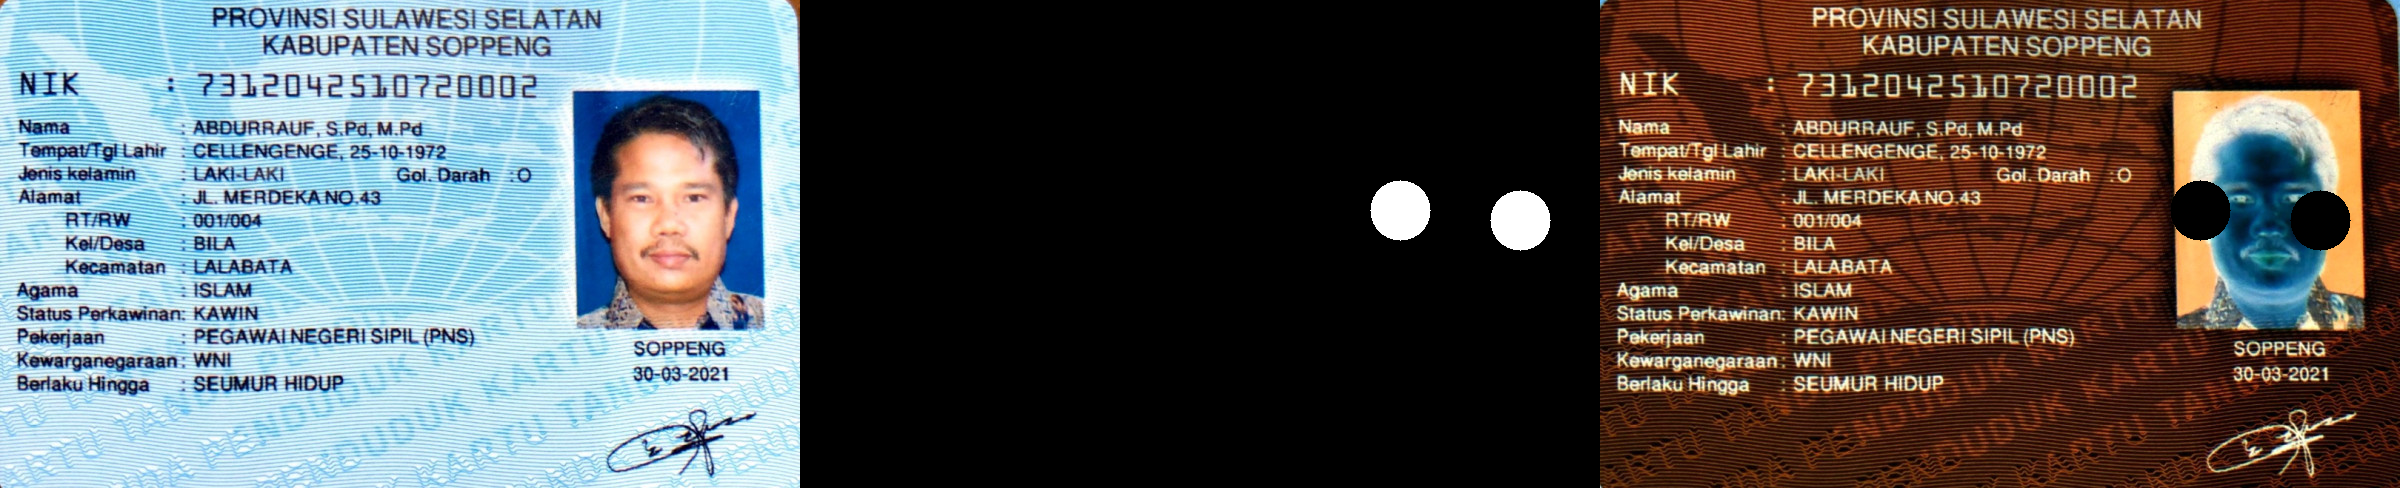

In [21]:
#NOT (Komplemen)
img_org = cv.imread('/content/drive/MyDrive/Semester 5/PCVK/Images/KTP.jpeg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (600, 210), 30, (255,255,255), -1)

mask2 = np.zeros(img_org.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (720, 220), 30, (255,255,255), -1)


result = ~img_org & ~mask
#fungsi dari opencv berikut juga bisa digunakan
#result - cv.bitwise_and(image, mask)

org_frame = cv.hconcat((img_org, mask, result))
cv2_imshow(org_frame)

**OPERATOR OR**

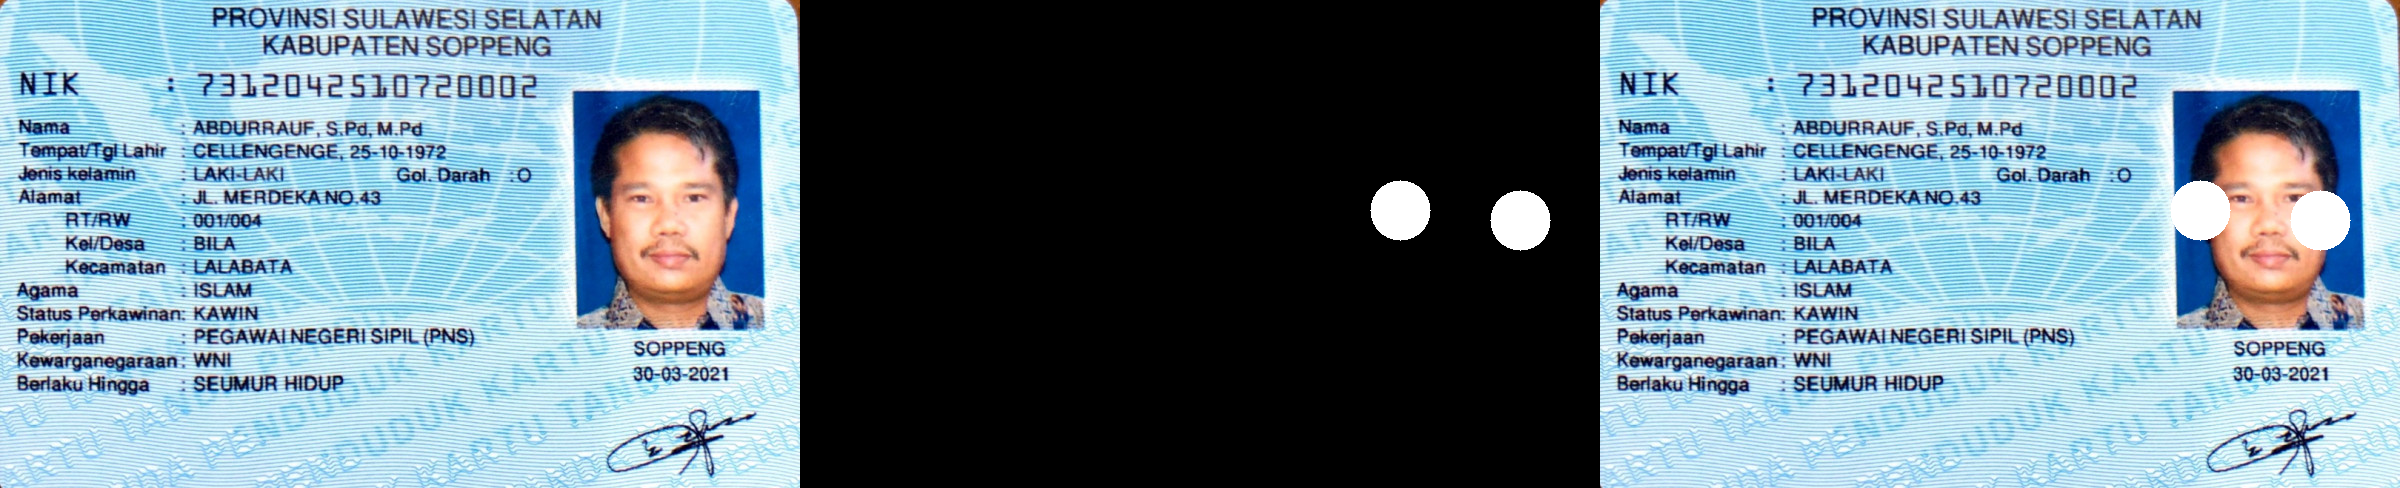

In [22]:
#OR (Atau)
img_org = cv.imread('/content/drive/MyDrive/Semester 5/PCVK/Images/KTP.jpeg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (600, 210), 30, (255,255,255), -1)

mask2 = np.zeros(img_org.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (720, 220), 30, (255,255,255), -1)


result = img_org | mask
#fungsi dari opencv berikut juga bisa digunakan
#result - cv.bitwise_or(image, mask)

org_frame = cv.hconcat((img_org, mask, result))
cv2_imshow(org_frame)

**OPERATOR AND**

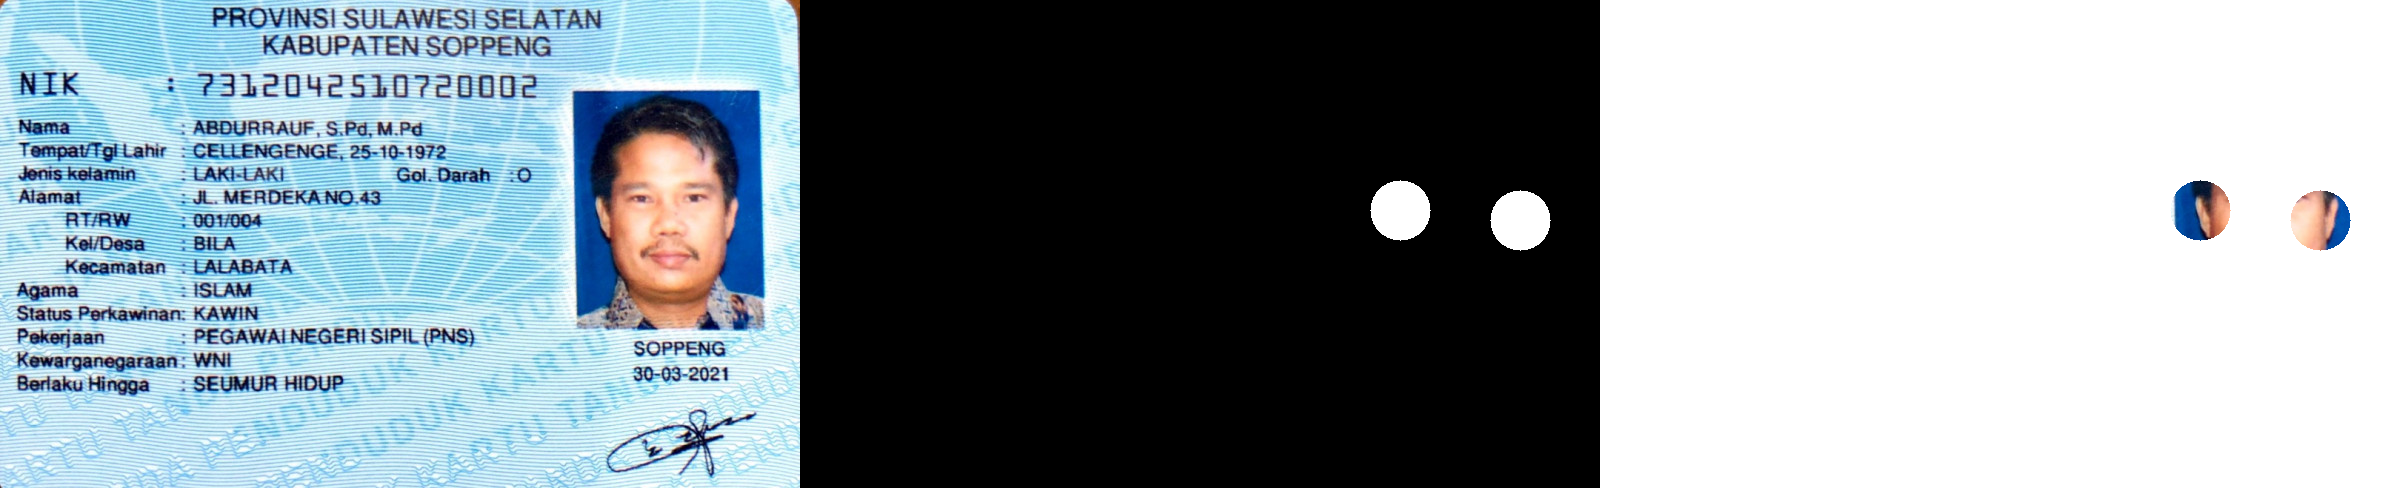

In [23]:
#AND (Dan)
img_org = cv.imread('/content/drive/MyDrive/Semester 5/PCVK/Images/KTP.jpeg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (600, 210), 30, (255,255,255), -1)

mask2 = np.zeros(img_org.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (720, 220), 30, (255,255,255), -1)


result = img_org & mask
#fungsi dari opencv berikut juga bisa digunakan
#result - cv.bitwise_and(image, mask)

result[mask==0] = 255
org_frame = cv.hconcat((img_org, mask, result))
cv2_imshow(org_frame)

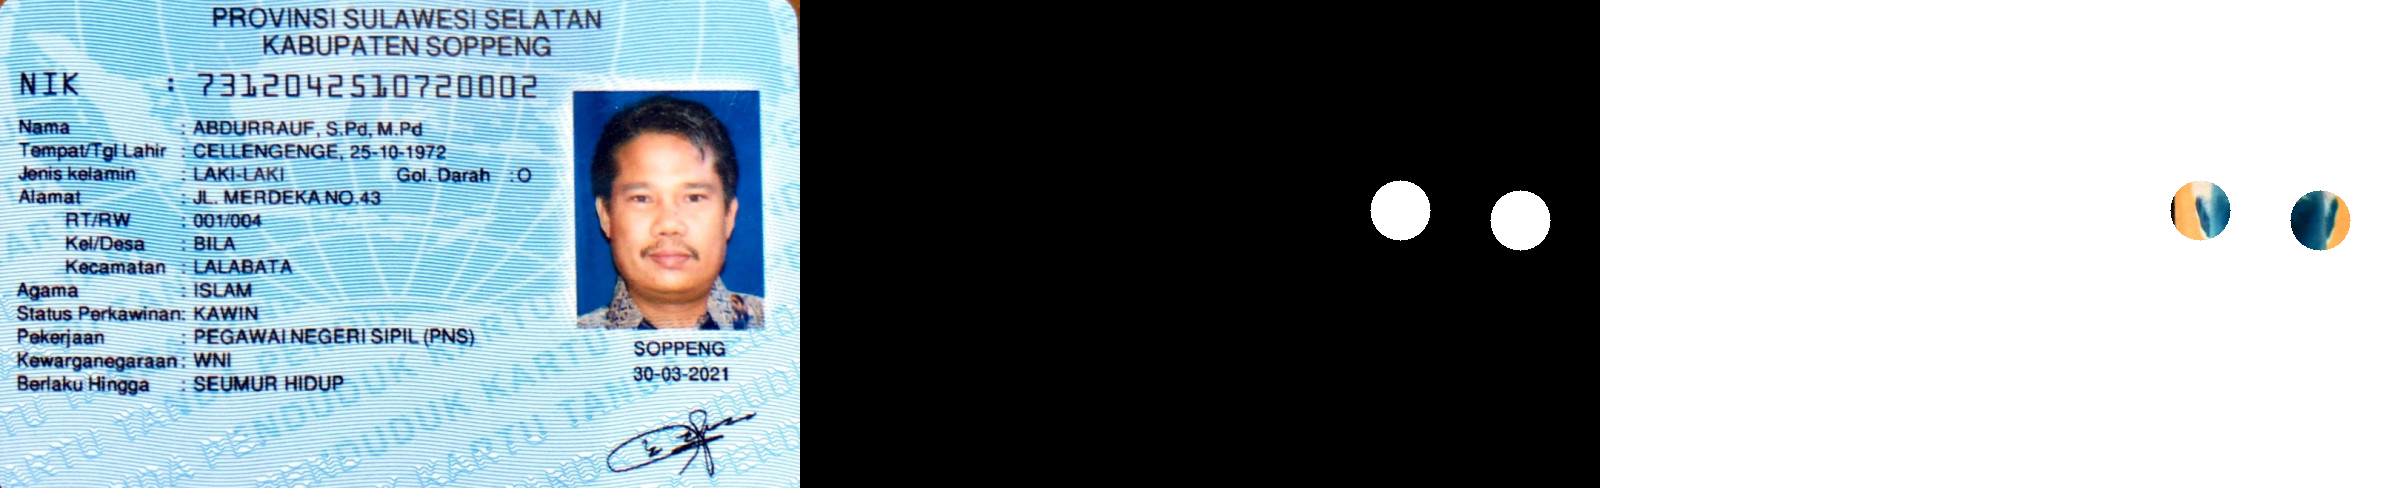

In [24]:
#NAND (Not And)
img_org = cv.imread('/content/drive/MyDrive/Semester 5/PCVK/Images/KTP.jpeg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (600, 210), 30, (255,255,255), -1)

mask2 = np.zeros(img_org.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (720, 220), 30, (255,255,255), -1)


result = ~img_org & mask
#fungsi dari opencv berikut juga bisa digunakan

result[mask==0] = 255
org_frame = cv.hconcat((img_org, mask, result))
cv2_imshow(org_frame)

**OPERATOR XOR (Exclusive OR)**

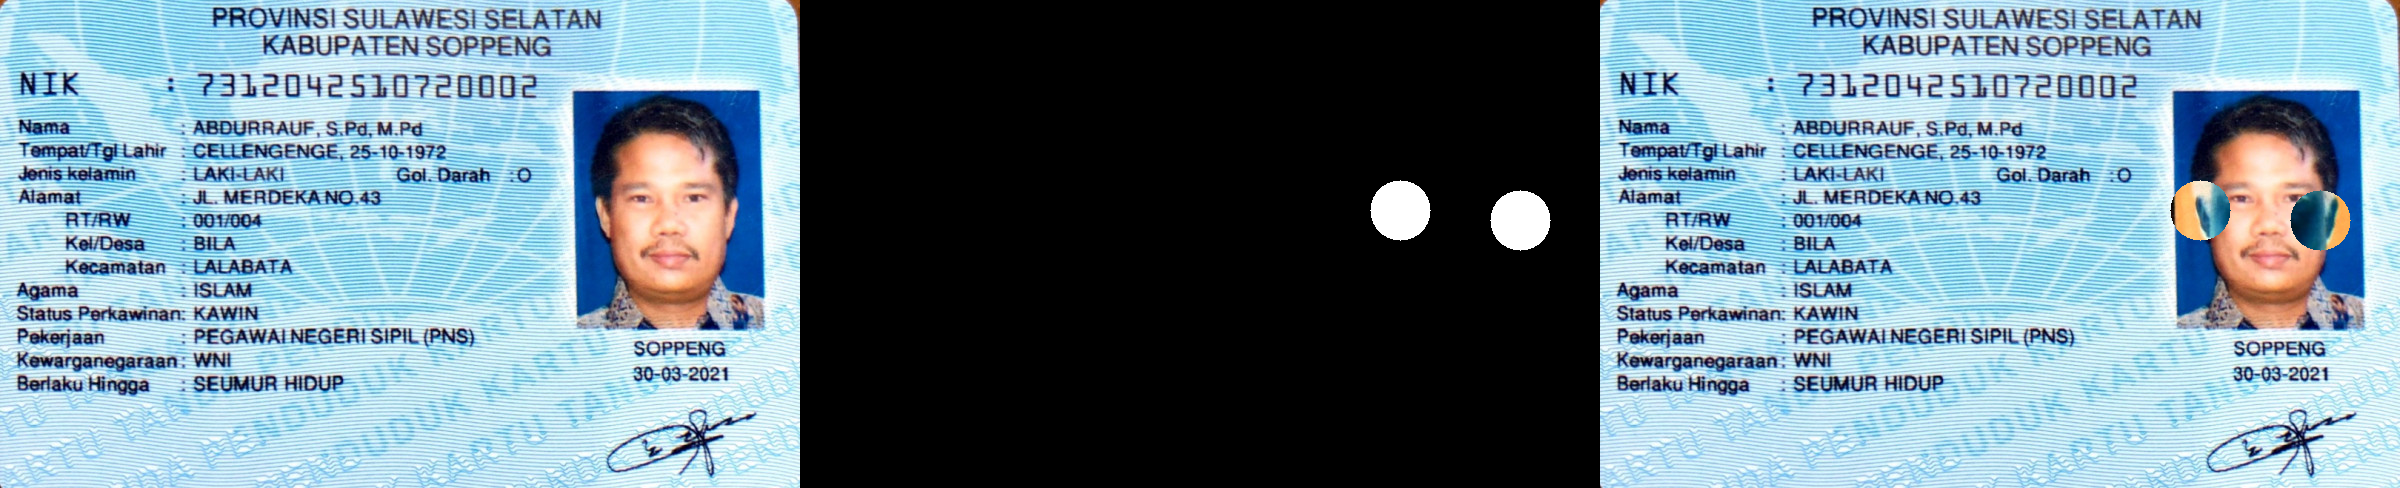

In [25]:
#XOR (Exclusive OR)
img_org = cv.imread('/content/drive/MyDrive/Semester 5/PCVK/Images/KTP.jpeg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (600, 210), 30, (255,255,255), -1)

mask2 = np.zeros(img_org.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (720, 220), 30, (255,255,255), -1)


#result = img_org ^ mask
#fungsi dari opencv berikut juga bisa digunakan
#result - cv.bitwise_and(image, mask)
result = cv.bitwise_xor(img_org, mask)

org_frame = cv.hconcat((img_org, mask, result))
cv2_imshow(org_frame)

**Kesimpulan tentang Image Masking**

 Dengan menerapkan teknik masking seperti  gambar di atas, kita dapat mengidentifikasi dan memisahkan area tertentu dalam gambar asli yang sesuai dengan bentuk lingkaran yang telah ditentukan sebelumnya. Area yang diidentifikasi ini akan tetap terlihat dalam hasil gambar yang telah dimasker (masked), sementara bagian di luar lingkaran akan menjadi gelap atau dapat dihapus, atau digantikan dengan latar belakang lain. Oleh karena itu, proses masking ini memungkinkan kita untuk mengisolasi objek tertentu dari latar belakang, yang nantinya dapat digunakan untuk menggantikannya dengan latar belakang yang berbeda sesuai kebutuhan.